<a href="https://colab.research.google.com/github/srikanthkote/ml-playground/blob/main/housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"housing.csv"

## Data loading

### Subtask:
Load the housing data from the provided CSV file.


**Reasoning**:
Load the housing data from the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df_housing = pd.read_csv('housing.csv')
    display(df_housing.head())
    print(df_housing.shape)
except FileNotFoundError:
    print("Error: 'housing.csv' not found. Please ensure the file is in the correct location.")
except pd.errors.ParserError:
    print("Error: Could not parse 'housing.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(20640, 10)


## Data exploration

### Subtask:
Explore the loaded housing data.


**Reasoning**:
I need to explore the data by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical features.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_housing.shape)

# Determine data types of each column
print("\nData Types of Columns:")
print(df_housing.info())

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df_housing.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df_housing.isnull().sum())

# Explore categorical features
print("\nCategorical Feature Exploration:")
for col in df_housing.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df_housing[col].unique()}")
    print(f"Value Counts:\n{df_housing[col].value_counts()}")

Shape of the DataFrame: (20640, 10)

Data Types of Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Descriptive Statistics for Numerical Features:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000

## Data visualization

### Subtask:
Visualize the distribution of numerical and categorical features in the housing dataset.


**Reasoning**:
Visualize the distribution of numerical and categorical features using histograms and bar plots, then save the plots.



In [3]:
import matplotlib.pyplot as plt

# Numerical features visualization
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df_housing[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'{col}_distribution.png')
    plt.close()

# Categorical feature visualization
plt.figure(figsize=(10, 6))
df_housing['ocean_proximity'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity Category')
plt.ylabel('Frequency')
plt.savefig('ocean_proximity_distribution.png')
plt.close()

## Data analysis

### Subtask:
Analyze the correlations between numerical features and the distribution of the target variable.


**Reasoning**:
Calculate the correlation matrix for numerical features, visualize the target variable's distribution, and identify potential relationships.



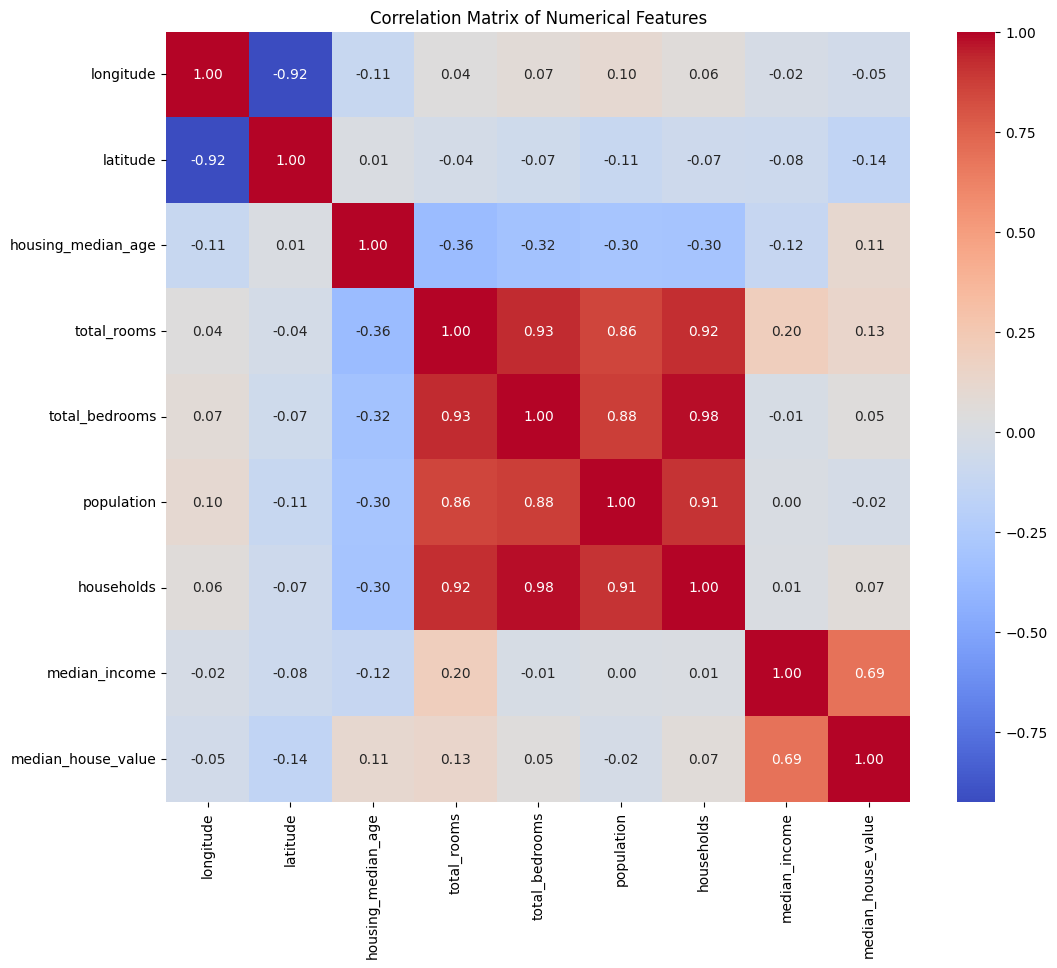

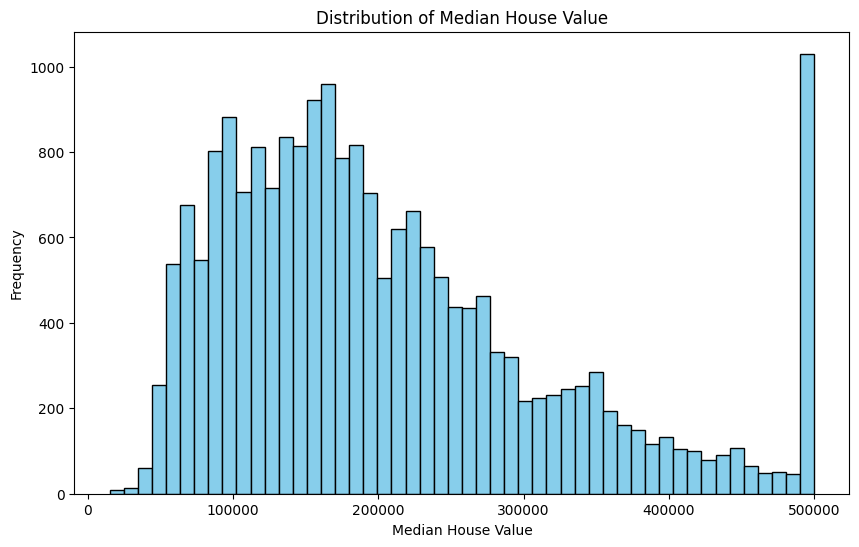

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                  'population', 'households', 'median_income', 'median_house_value']
correlation_matrix = df_housing[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(df_housing['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for the target variable
print(df_housing['median_house_value'].describe())

# Identify potential relationships (This will be done by inspecting the outputs above)

## Summary:

### Q&A
There were no explicit questions asked in the provided task. However, the analysis implicitly aims to answer questions like: What are the key characteristics of this dataset? Are there any missing values? How are the features distributed? What are the relationships between the features and the target variable (median house value)?

### Data Analysis Key Findings
* The dataset contains 20,640 instances and 10 features, including numerical features like longitude, latitude, housing age, and median income, as well as a categorical feature representing ocean proximity.
* The `total_bedrooms` feature has 207 missing values, which might need to be addressed in further analysis.
* The `ocean_proximity` feature has five unique categories, with most instances belonging to '<1H OCEAN', 'INLAND', and 'NEAR OCEAN'. 'ISLAND' is a rare category.
* The distribution of `median_house_value`, the target variable, shows some potential skewness or outliers, as revealed by its descriptive statistics and histogram.  The mean is approximately \$206,856.
* Correlations exist between various numerical features and the target variable, with some features exhibiting stronger correlations than others.  The strength of these relationships were not explicitly quantified.


### Insights or Next Steps
* Investigate the missing values in `total_bedrooms` (207 instances) and determine an appropriate imputation strategy.
* Further explore the relationship between `median_house_value` and other features, potentially using more sophisticated statistical methods or machine learning models.  Consider addressing the potential skewness in the target variable distribution.
